<a href="https://colab.research.google.com/github/pokwir/Ted-Talks-Recommender-System/blob/main/rough_work/models/t5/T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resources:

*   https://simpletransformers.ai/docs/t5-model/
*   https://wandb.ai/mukilan/T5_transformer/reports/Exploring-Google-s-T5-Text-To-Text-Transformer-Model--VmlldzoyNjkzOTE2

*   https://huggingface.co/learn/nlp-course/chapter1/1?fw=tf
*   https://huggingface.co/docs/transformers/model_doc/t5
*   https://github.com/huggingface/transformers/tree/main/docs

*   https://arxiv.org/pdf/1910.10683.pdf



In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/TED_Project/Data_output/ted_talk_clean_merged_bert.csv',
                 parse_dates=['date']).drop(columns=['Unnamed: 0'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5140 entries, 0 to 5139
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   author       5140 non-null   object        
 1   title        5140 non-null   object        
 2   description  5140 non-null   object        
 3   likes        5140 non-null   int64         
 4   views        5140 non-null   int64         
 5   transcript   5140 non-null   object        
 6   date         5140 non-null   datetime64[ns]
 7   tags         5140 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 321.4+ KB


In [ ]:
df.head()

,author,title,description,likes,views,transcript,date,tags
0,Machine Dazzle,how to unleash your inner maximalist through c...,tapping into the transformational power of cos...,8100,270192,"Hello, I am Machine Dazzle, and I am an emotio...",2023-06-01,"art, creativity, design, fashion, performance"
1,Jioji Ravulo,a liberating vision of identity that transcend...,how can we move past societys inclination to b...,9200,309952,Can you paint with all the colors of the wind?...,2023-06-01,"diversity, identity, inclusion, indigenous_peo..."
2,Rebecca Darwent,how to fund real change in your community,is there a way to give back that benefits ever...,1000,341218,I spent my whole career in the nonprofit secto...,2023-06-01,"business, community, equality, humanity, money..."
3,Susanne Buckley-Zistel,what caused the rwandan genocide,for one hundred days in 1994 the african count...,3700,126376,"For 100 days in 1994, the African country of R...",2023-06-01,"africa, animation, education, history, identit..."
4,Conor Russomanno,a powerful new neurotech tool for augmenting y...,in an astonishing talk and tech demo neurotech...,1100,374259,I became obsessed with the relationship betwee...,2023-06-01,"biotech, brain, disability, health, invention,..."


In [ ]:
df.describe()

,likes,views
count,5.140000e+03,5.140000e+03
mean,1.024916e+04,2.432655e+06
std,6.903838e+04,3.969021e+06
min,1.000000e+02,1.284700e+04
25%,3.100000e+03,9.714188e+05
50%,4.900000e+03,1.574606e+06
75%,7.400000e+03,2.363530e+06
max,2.200000e+06,7.523536e+07


import numpy as np
from google.colab import autoviz
df_8584346972397455242 = autoviz.get_registered_df('df_8584346972397455242')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8584346972397455242, *['likes'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8584346972397455242 = autoviz.get_registered_df('df_8584346972397455242')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8584346972397455242, *['views'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8584346972397455242 = autoviz.get_registered_df('df_8584346972397455242')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8584346972397455242, *['likes'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8584346972397455242 = autoviz.get_registered_df('df_8584346972397455242')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8584346972397455242, *['views'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8584346972397455242 = autoviz.get_registered_df('df_8584346972397455242')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_8584346972397455242, *[[['likes', 'views']]], **{})
chart

In [ ]:
df['likes'].describe()

count    5.140000e+03
mean     1.024916e+04
std      6.903838e+04
min      1.000000e+02
25%      3.100000e+03
50%      4.900000e+03
75%      7.400000e+03
max      2.200000e+06
Name: likes, dtype: float64

<Axes: xlabel='date'>

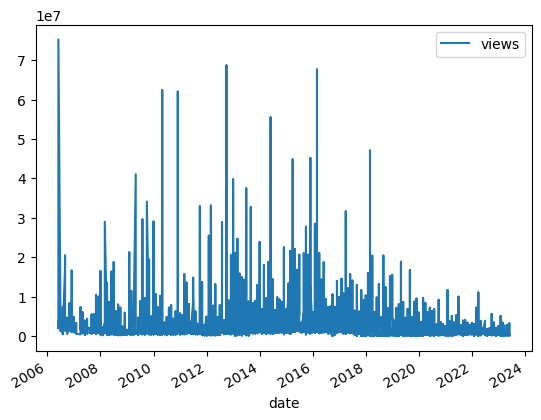

In [ ]:
df[['date','views']].set_index('date').plot()

<Axes: xlabel='date'>

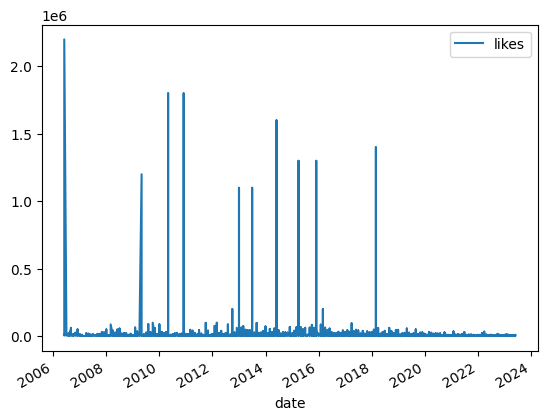

In [ ]:
df[['date','likes']].set_index('date').plot()

**Note to self**:
1. Consider checking for seasonality and removing trends?
2. Consider merging SQL tables and then converting to pandas

# Builing the Recommender
**Recommender A:**
1. Summarize: summarize the transcript into short sentences 40-80 words
2. Similarity: perform cross-similarity on the df['summary']


**Recommender B**
1. Summarize: df['summary'] <- df['transcript']
2. Concat: df['soup'] = df['description'] + ['summary'] + df['tag']
3. Vectorize: df['soup_vector'] <- df['soup'] (with another tokenizer)
4. Cross-similarity on the df['soup_vector']



## Recommender A

In [31]:
import os
import sys
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from tqdm import tqdm

In [ ]:
!pip install transformers
!pip install sentencepiece
#import libraries
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
#set up tokenizer and model
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small', return_dict=True)


In [4]:
stsb_sentence_1 = ("Luffy was fighting in the war.")
stsb_sentence_2 = ("Luffy's fighting style is comical.")
input_ids = tokenizer("stsb sentence 1: "+stsb_sentence_1+" sentence 2: "+stsb_sentence_2, return_tensors="pt").input_ids
stsb_ids = model.generate(input_ids)
stsb = tokenizer.decode(stsb_ids[0],skip_special_tokens=True)
print(stsb)


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


4.0


In [7]:
df.head(1)

,author,title,description,likes,views,transcript,date,tags
0,Machine Dazzle,how to unleash your inner maximalist through c...,tapping into the transformational power of cos...,8100,270192,"Hello, I am Machine Dazzle, and I am an emotio...",2023-06-01,"art, creativity, design, fashion, performance"


In [39]:
def text_summarizer(transcript):

    inputs = tokenizer.encode("summarize: " + transcript,
                          return_tensors='pt',
                          max_length=len(transcript.split()),
                          truncation=True)
    summarization_ids = model.generate(inputs, max_length=60, min_length=20,
                                       length_penalty=5., num_beams=2,
                                       early_stopping=True)
    summarization = tokenizer.decode(summarization_ids[0], skip_special_tokens=True)
    return summarization

In [33]:
def similarity(stsb_sentence_1, stsb_sentence_2):
    input_ids = tokenizer("stsb sentence 1: "+stsb_sentence_1+" sentence 2: "+stsb_sentence_2, return_tensors="pt").input_ids
    stsb_ids = model.generate(input_ids)
    stsb = tokenizer.decode(stsb_ids[0],skip_special_tokens=True)
    return stsb

In [40]:
# sentences = df['transcript'].sample(2).values
# stsb_sentence_1 = text_summarizer(sentences[0])
# stsb_sentence_2 = text_summarizer(sentences[1])
# similarity(stsb_sentence_1, stsb_sentence_2)

In [41]:
df['summary']=None
for idx in tqdm(df.index):
    df.loc[idx,'summary'] = text_summarizer(df.loc[idx,'transcript'])

100%|██████████| 5140/5140 [4:41:33<00:00,  3.29s/it]


In [42]:
# saving the updated df
df.to_csv('/content/drive/MyDrive/TED_Project/Data_output/ted_talk_clean_merged_bert_summary_t5_v2.csv')

In [43]:
df['summary'].head()

0    '24 Decades: a history of popular music' premi...
1    a queer culture is a part of dominant queer cu...
2    philanthropy is rooted in a concept called bla...
3    the seeds of this conflict were planted a cent...
4    empathetic computing is a new tool for cogniti...
Name: summary, dtype: object

#### Evaluation of summarization
**Scoring the summarization with ROUGE**
https://huggingface.co/learn/nlp-course/chapter7/5?fw=tf#metrics-for-text-summarization

In [55]:
similarity(df['summary'][0], df['description'][0])

'3.6'

In [56]:
df['summary_description_similarity']=None
df['summary_similarity_description']=None
for idx in tqdm(df.index):
    description = df.loc[idx,'description'].strip().replace("\n","")
    summary = df.loc[idx,'summary']
    df.loc[idx, 'summary_description_similarity'] = similarity(description, summary)
    df.loc[idx, 'summary_similarity_description'] = similarity(summary, description)


  0%|          | 0/5140 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100%|██████████| 5140/5140 [17:34<00:00,  4.87it/s]


In [57]:
df.head(2)

,author,title,description,likes,views,transcript,date,tags,summary,summary_description_similarity,summary_similarity_description
0,Machine Dazzle,how to unleash your inner maximalist through c...,tapping into the transformational power of cos...,8100,270192,"Hello, I am Machine Dazzle, and I am an emotio...",2023-06-01,"art, creativity, design, fashion, performance",'24 Decades: a history of popular music' premi...,2.8,3.6
1,Jioji Ravulo,a liberating vision of identity that transcend...,how can we move past societys inclination to b...,9200,309952,Can you paint with all the colors of the wind?...,2023-06-01,"diversity, identity, inclusion, indigenous_peo...",a queer culture is a part of dominant queer cu...,1.0,3.6


In [ ]:
# saving the updated df
df.to_csv('/content/drive/MyDrive/TED_Project/Data_output/ted_talk_clean_merged_bert_summary_t5_v2_rough_backup.csv')

### Building the similarity matrix

In [ ]:
values = df['summary'].values # values will be the sentence summaries
df_summary = pd.DataFrame(index=values, columns=values)
display(df_summary.iloc[:10,:10])

In [44]:
def similarity_matrix(df_summary):
    df = df_summary.copy()
    for row_idx, row in tqdm(enumerate(df.index)):
        for col in tqdm(df.columns[row_idx:]):
            # the function
            df.loc[row,col]=row+" "+col
            # similarity function
            # similarity(row, col)
    for row_idx, row in enumerate(df.index):
        for col in df.columns[row_idx:]:
            df.loc[col,row] = df.loc[row,col]
    return df

# sim_matrix = similarity_matrix(df_summary)

,'24 Decades: a history of popular music' premiered in Brooklyn at St. Ann's Warehouse in 2016. '24 Decades: a history of popular music' is a 24-hour show. it's a show about,a queer culture is a part of dominant queer culture. a queer culture is based on the individual. a queer culture is based on the individual. a queer culture is based on the individual.,philanthropy is rooted in a concept called black philanthropy. philanthropy is rooted in a concept called Ubuntu. it's an African philosophy widely understood as humanity towards others. philanthrop,"the seeds of this conflict were planted a century earlier, first when german, and later Belgian, colonizers arrived in the country. many Hutus and Tutsi civilians were on good terms, but colonial powers encouraged political division. over the following","empathetic computing is a new tool for cognitive exploration. it can measure the user’s heart, skin, muscles, eyes and brain. it can measure the user’s heart, skin, muscles, eyes and brain. it can measure the user’s body","women in the islamic Republic of Iran have been adrift in a vast sea of oppression. despite the brutal killing of smugglers, women in the country have been adrift. they have no legal protection against sexual harassment and","solar is the cheapest form of energy to produce, surpassing fossil fuel alternatives like coal and natural gas. millions of homes are equipped with rooftop solar, with most units paying for themselves in their first 7 to 12 years.","ed hussein: a new law has accelerated the global fight against climate change. hussein: in the last year, eight countries eliminated at least one neglected tropical disease. hussein: we've seen a change in the world","sheryl Lee's first movie, 'Abbott Elementary,' was a success. she's a young black girl, and she's a talented black girl. she says she's a woman, and she's an artist.","a thief forged fake letters from the queen to purchase an outrageously expensive diamond necklace. the truth came out eventually, but the public already saw her as a wasteful spendthrift. despite her personal reservations, she tried to work with reformers"
'24 Decades: a history of popular music' premiered in Brooklyn at St. Ann's Warehouse in 2016. '24 Decades: a history of popular music' is a 24-hour show. it's a show about,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a queer culture is a part of dominant queer culture. a queer culture is based on the individual. a queer culture is based on the individual. a queer culture is based on the individual.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
philanthropy is rooted in a concept called black philanthropy. philanthropy is rooted in a concept called Ubuntu. it's an African philosophy widely understood as humanity towards others. philanthrop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"the seeds of this conflict were planted a century earlier, first when german, and later Belgian, colonizers arrived in the country. many Hutus and Tutsi civilians were on good terms, but colonial powers encouraged political division. over the following",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"empathetic computing is a new tool for cognitive exploration. it can measure the user’s heart, skin, muscles, eyes and brain. it can measure the user’s heart, skin, muscles, eyes and brain. it can measure the user’s body",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"women in the islamic Republic of Iran have been adrift in a vast sea of oppression. despite the brutal killing of smugglers, women in the country have been adrift. they have no legal protection against sexual harassment and",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"solar is the cheapest form of energy to produce, surpassing fossil fuel alternatives like coal and natural gas. millions of homes are equipped with rooftop solar, with most units paying for themselves in their first 7 to 12 years.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"ed hussein: a new law has accelerated the global fight against climate change. hussein

In [ ]:
display(df_summary.shape)
sim_matrix_df = similarity_matrix(df_summary)


sim_matrix_df.to_csv('/content/drive/MyDrive/TED_Project/Data_output/ted_talk_t5_sim_matrix_df.csv')

(5140, 5140)

0it [00:00, ?it/s]
100%|██████████| 5140/5140 [00:01<00:00, 2847.56it/s]
1it [00:01,  1.82s/it]
100%|██████████| 5139/5139 [00:01<00:00, 2848.94it/s]
2it [00:03,  1.81s/it]
100%|██████████| 5138/5138 [00:01<00:00, 2833.13it/s]
3it [00:05,  1.82s/it]
100%|██████████| 5137/5137 [00:01<00:00, 2873.11it/s]
4it [00:07,  1.81s/it]
100%|██████████| 5136/5136 [00:01<00:00, 2910.77it/s]
5it [00:09,  1.80s/it]
100%|██████████| 5135/5135 [00:01<00:00, 2850.45it/s]
6it [00:10,  1.80s/it]
100%|██████████| 5134/5134 [00:01<00:00, 2900.91it/s]
7it [00:12,  1.79s/it]
100%|██████████| 5133/5133 [00:01<00:00, 2934.39it/s]
8it [00:14,  1.78s/it]
100%|██████████| 5132/5132 [00:01<00:00, 2938.94it/s]
9it [00:16,  1.77s/it]
100%|██████████| 5131/5131 [00:02<00:00, 2557.32it/s]
10it [00:18,  1.85s/it]
100%|██████████| 5130/5130 [00:01<00:00, 2750.09it/s]
11it [00:20,  1.86s/it]
100%|██████████| 5129/5129 [00:01<00:00, 2814.76it/s]
12it [00:21,  1.85s/it]
100%|██████████| 5128/5128 [00:01<00:00, 2883.81it/s]


## Recommender B

In [ ]:
df['soup'] = df['description'] + ' ' + ['summary'] + ' ' + df['tag']
df.head(3)

### Building the similarity matrix

In [ ]:
values = df['soup'].values # values will be the sentence summaries
df_soup = pd.DataFrame(index=values, columns=values)
display(df_soup.iloc[:10,:10])

In [ ]:
display(df_soup.shape)
soup_sim_matrix_df = similarity_matrix(df_soup)


soup_sim_matrix_df.to_csv('/content/drive/MyDrive/TED_Project/Data_output/ted_talk_t5_soup_sim_matrix_df.csv')